<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="http://bokeh.pydata.org/en/latest/_static/bokeh-transparent.png" 
               style="width:70px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial &mdash; Sharing and Embedding
       </td>
   </tr>
</table>

# Creating a Plot to Share

In [1]:
import pandas as pd
from bokeh.plotting import figure

AAPL = pd.read_csv(
    "http://ichart.yahoo.com/table.csv?s=AAPL&a=0&b=1&c=2000&d=0&e=1&f=2015",
    parse_dates=['Date'])
MSFT = pd.read_csv(
    "http://ichart.yahoo.com/table.csv?s=MSFT&a=0&b=1&c=2000&d=0&e=1&f=2015",
    parse_dates=['Date'])
IBM = pd.read_csv(
    "http://ichart.yahoo.com/table.csv?s=IBM&a=0&b=1&c=2000&d=0&e=1&f=2015",
    parse_dates=['Date'])

def make_figure():
    p = figure(x_axis_type="datetime", width=700, height=300)

    p.line(AAPL['Date'], AAPL['Adj Close'], color='#A6CEE3', legend='AAPL')
    p.line(IBM['Date'], IBM['Adj Close'], color='#33A02C', legend='IBM')
    p.line(MSFT['Date'], MSFT['Adj Close'], color='#FB9A99', legend='MSFT')

    p.title = "Stock Closing Prices"
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'Price'
    p.legend.orientation = "top_left"
    return p

Embed functions all look for a Plot object. Common plot objects are:
 * `Plot` from models
 * `figure` from plotting
 * `Chart` from charts
 * `vplot`, `hplot` from plotting

# Displaying in the Notebook

In [2]:
from bokeh.io import output_notebook, show


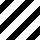
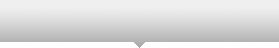
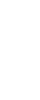
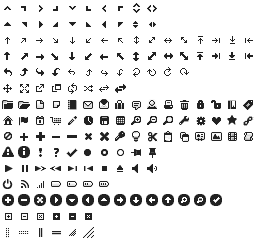
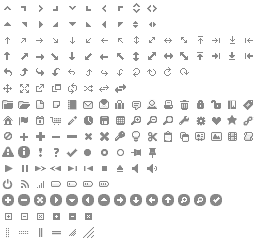
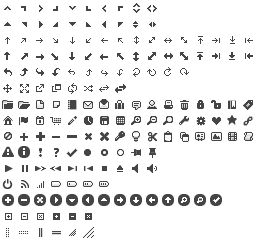
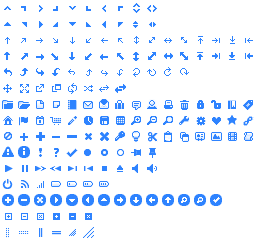
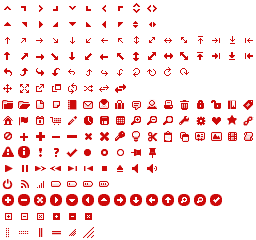
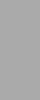
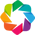
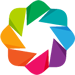
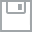
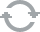
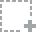
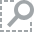
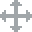
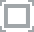
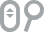

In [3]:
output_notebook()

In [4]:
p = make_figure()
show(p)

# Saving to an HTML File

In [5]:
from bokeh.io import output_file, show

In [6]:
output_file("tutorial_sharing.html")

In [7]:
p = make_figure()
show(p)   # save(p) will save without opening a new browser tab

# Publishing to a Bokeh Server

# Templating in HTML Documents

In [8]:
import jinja2
from bokeh.embed import components

In [9]:
template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/release/bokeh-0.9.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/release/bokeh-0.9.0.min.js"
></script>

<body>

    <h1>Hello Bokeh!</h1>
    
    <p> Below is a simple plot of stock closing prices </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [10]:
p = make_figure()
script, div = components(p)

In [11]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))

In [12]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_bokeh():
    return template.render(script=script, div=div)

In [13]:
# Uncomment to run the Flask Server. Use Kernel -> Interrupt from Notebook menubar to stop 
#app.run(port=5050)

In [14]:
# EXERCISE: Create your own template (or modify the one above) 